In [46]:
import numpy as np
import scipy.io

mat = scipy.io.loadmat('TrainingSamplesDCT_8')
FG = mat["TrainsampleDCT_FG"]
BG = mat["TrainsampleDCT_BG"]
total = FG.shape[0] + BG.shape[0]
prior_1  = FG.shape[0] / total
prior_0 = BG.shape[0] / total
# Question A:
print("Prior probability of Cheetah is:", prior_1)
print("Prior probability of grass is:", prior_0)

Prior probability of Cheetah is: 0.1918649270913277
Prior probability of grass is: 0.8081350729086723


In [75]:
# Question B:
from scipy.fftpack import dct

def dct2(block):
    return dct(dct(block.T, norm='ortho').T, norm='ortho')

def second_largest_index(arr):
    return np.argmax(np.abs(arr[1:])) + 1

def preprocess_training_data(X_train):
    out = np.zeros(X_train.shape[0])
    for i, arr in enumerate(X_train):
        out[i] = second_largest_index(arr)
    return out

def gen_zigzag_arr(block):
    arr = np.zeros(64)
    for i, line in enumerate(zigzag):
        for j, index in enumerate(line):
            arr[index] = block[i, j]
    return arr

# import zig-zag pattern
with open("Zig-Zag Pattern.txt", "r") as f:
    content = f.readlines()
    
zigzag = []
for line in content:
    index = []
    for num in line.strip().split(" "):
        if num != "":
            index.append(int(num))
    if index!=[]:        
        zigzag.append(index)
zigzag = np.array(zigzag)

X_1 = preprocess_training_data(FG)
X_0 = preprocess_training_data(BG)

(array([ 0., 39., 44., 10., 13., 17., 22., 27., 13.,  2.,  0.,  2., 12.,
        15.,  8.,  2.,  3.,  7.,  8.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <a list of 40 Patch objects>)

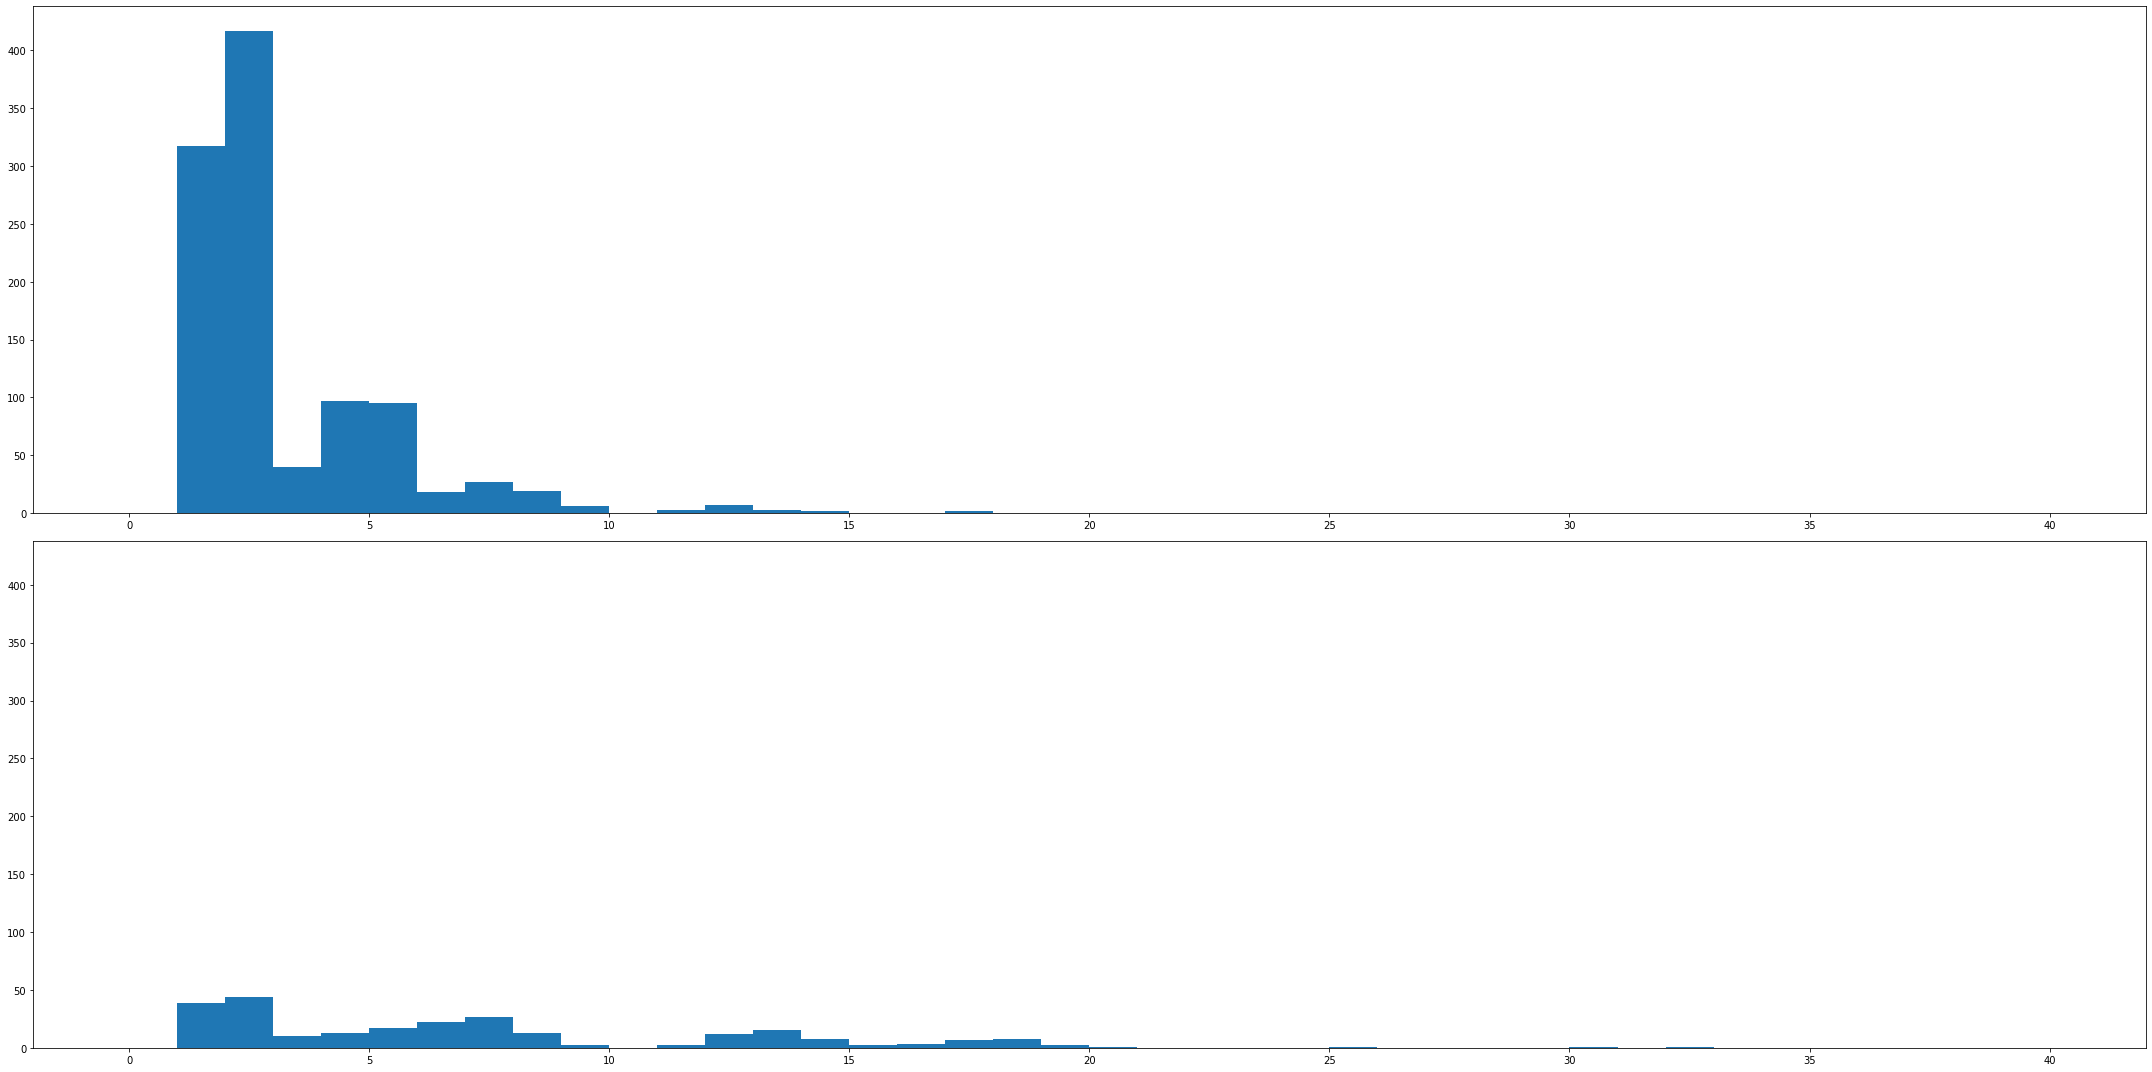

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors

fig, axs = plt.subplots(2, 1, sharey=True, tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(30)
axs[0].hist(X_0, bins = 40, range = (0, 40))
axs[1].hist(X_1, bins = 40, range = (0, 40))

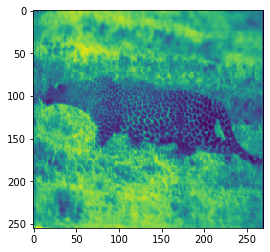

(255, 270)


In [110]:
from PIL import Image
import numpy as np
img = Image.open("cheetah.bmp", "r")
img = np.array(img) 

plt.imshow(img)
plt.show()

print(img.shape)
def slicing(img):
    out = np.zeros((img.shape[0] - 7, img.shape[1] - 7))
    for i in range(len(img) - 7):
        for j in range(len(img[i]) - 7):
            window = img[i:i+8, j:j+8]
            dct_result = dct2(window)
            arr = gen_zigzag_arr(dct_result)
            out[i,j] = second_largest_index(arr)
    return out
X_processed = slicing(img)

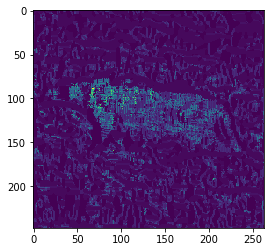

In [111]:
plt.imshow(X_processed)
plt.show()

/Users/fischer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


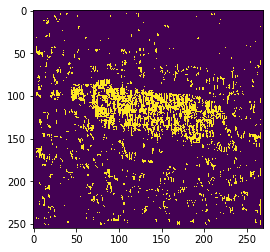

In [113]:
# Question C:

def compute_dist(X):

    count_x = {} 

    for item in X:
        if item not in count_x.keys():
            count_x[int(item)] = 1
        else:
            count_x[int(item)] += 1
    dist = np.zeros(100)
    for k in count_x.keys():
        dist[k] = count_x[k]
    return dist / np.sum(dist)

P_x0 = compute_dist(X_0)
P_x1 = compute_dist(X_1)

def BDT(X_processed):
    mask = np.zeros((X_processed.shape[0] + 7, X_processed.shape[1] + 7))
    for i in range(len(X_processed)):
        for j in range(len(X_processed[i])):
            index = int(X_processed[i,j])
            rate = P_x0[index] / P_x1[index]
            if rate > prior_1 / prior_0:
                mask[i + 4,j + 4] = 0
            else:
                mask[i + 4,j + 4] = 1
    return mask
mask = BDT(X_processed)
plt.imshow(mask)
plt.show()

In [118]:
ground_truth = Image.open("cheetah_mask.bmp", "r")
ground_truth = np.array(ground_truth).astype(int) 

print("Error probability:", np.sum(ground_truth != mask) / (mask.shape[0] * mask.shape[1]))

Error probability: 0.23453885257806825
